In [93]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from times_series_workflow import *
from clean_data import clean
import pandas_ta as ta

In [94]:
#loading data
data=pd.read_csv("data/technical analysis/ta_btc.csv")

In [95]:
data.head()

,Unnamed: 0,open_time,open,high,low,close,volume,close_time,qav,num_trades,...,%D,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,conversion_line,base_line,lead_span_A,lead_span_B,lagging_span,CCI
0,0,2020-01-01 00:00:00,7195.24,7245.00,7175.46,7224.21,3646.232354,1577858399999,2.631450e+07,44901,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8077.68,NaN
1,1,2020-01-01 06:00:00,7224.24,7237.73,7180.00,7197.20,4415.466238,1577879999999,3.182890e+07,51073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8055.98,NaN
2,2,2020-01-01 12:00:00,7197.20,7255.00,7196.15,7236.83,5443.680806,1577901599999,3.934948e+07,55857,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7941.83,NaN
3,3,2020-01-01 18:00:00,7237.02,7246.72,7175.15,7200.85,3287.008767,1577923199999,2.372158e+07,42179,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7878.56,NaN
4,4,2020-01-02 00:00:00,7200.77,7212.50,7116.70,7138.93,5561.311699,1577944799999,3.980317e+07,60466,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7798.60,NaN


In [96]:
data.drop("Unnamed: 0", axis=1, inplace=True)



In [97]:
data = data.dropna().copy()

In [98]:
data=data.sort_values('open_time')

In [99]:
data=data.reset_index(drop=True)

In [100]:
data.head()

,open_time,open,high,low,close,volume,close_time,qav,num_trades,taker_base_vol,...,%D,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,conversion_line,base_line,lead_span_A,lead_span_B,lagging_span,CCI
0,2020-02-29 18:00:00,8651.76,8676.00,8523.55,8523.61,6909.498159,1583020799999,5.959308e+07,82883,3299.843644,...,20.087563,-256.142004,-3.432722,-252.709282,9060.00,9410.000,9862.5,8286.5,8741.53,-119.532854
1,2020-03-01 00:00:00,8523.61,8675.00,8511.11,8586.83,8957.065560,1583042399999,7.695507e+07,107810,4248.999557,...,20.054477,-250.569113,1.712135,-252.281248,9060.00,9359.590,9862.5,8286.5,8309.91,-95.418354
2,2020-03-01 06:00:00,8586.50,8650.00,8518.00,8648.37,8106.169400,1583063999999,6.943837e+07,93946,4135.089393,...,24.896536,-238.438226,11.074418,-249.512644,9060.00,9352.485,9862.5,8286.5,8033.31,-74.707898
3,2020-03-01 12:00:00,8647.42,8750.00,8454.57,8500.00,15720.950431,1583085599999,1.348397e+08,159233,7678.727169,...,25.324145,-238.052508,9.168108,-247.220617,8935.51,9347.500,9862.5,8286.5,7932.05,-89.605892
4,2020-03-01 18:00:00,8499.87,8591.82,8411.00,8531.88,11108.016388,1583107199999,9.449621e+07,111030,5775.552747,...,23.534682,-232.494325,11.781033,-244.275358,8894.22,9330.500,9862.5,8286.5,7804.92,-119.003329


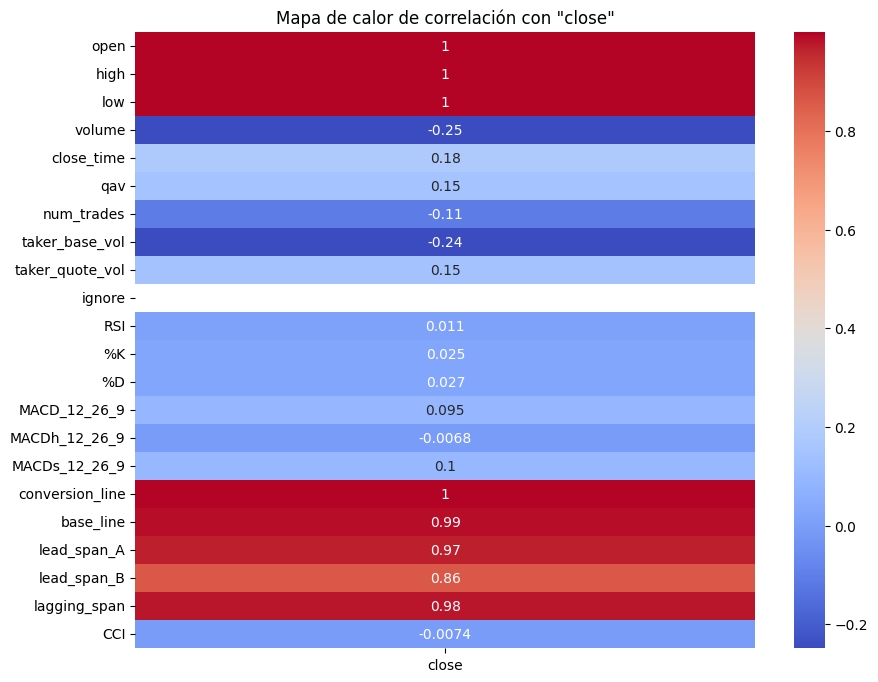

In [101]:
#ploting the correlation map
correlation_matrix = data.corr()

# Filtra las correlaciones de "close" con las demás columnas
close_correlations = correlation_matrix['close'].drop('close')

# Crea el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(close_correlations.to_frame(), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de correlación con "close"')
plt.show()

In [102]:
data.shape

(4715, 24)

In [103]:
# Let's define the global variables of our dataset
TARGET = '$ close'
N_TARGETS = 1
N_FEATURES = 19

In [104]:
X=data.drop(columns=["open_time","close"])
y=data["close"]

In [176]:
X.shape

(4715, 22)

In [177]:
y.shape

(4715,)

In [105]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
X_scaled=scaler.fit_transform(X)


In [75]:
X_scaled

array([[0.06377653, 0.05531195, 0.07464702, ..., 0.03433166, 0.06517971,
        0.39435238],
       [0.06177636, 0.05529629, 0.07445117, ..., 0.03433166, 0.05844281,
        0.42326638],
       [0.06275795, 0.05490479, 0.07455965, ..., 0.03433166, 0.05412553,
        0.44809884],
       ...,
       [0.34781813, 0.34163618, 0.36268486, ..., 0.39398912, 0.36610747,
        0.51043691],
       [0.34780439, 0.35003492, 0.36235441, ..., 0.39398912, 0.36103037,
        0.74931291],
       [0.35620496, 0.34894951, 0.36876048, ..., 0.39398912, 0.36100353,
        0.73564054]])

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3772, 22)
(3772,)
(943, 22)
(943,)


In [108]:
import numpy as np

y_train = y_train.values.reshape(-1, 1)

In [170]:
# def create_dataset(dataset, time_step=1):
#     dataX, dataY = [], []
#     for i in range(len(dataset)-time_step-1):
#         a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
#         dataX.append(a)
#         dataY.append(dataset[i + time_step, 0])
#     return np.array(dataX), np.array(dataY)

In [172]:
# time_step = 15
# X_train= create_dataset(X_train, time_step)
# y_train = create_dataset(y_train, time_step)
# X_test = create_dataset(X_test, time_step)
# y_test = create_dataset(y_test, time_step)

# print("X_train: ", X_train.shape)
# print("y_train: ", y_train.shape)
# print("X_test: ", X_test.shape)
# print("y_test", y_test.shape)

In [173]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

AttributeError: 'tuple' object has no attribute 'reshape'

In [109]:
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import LSTM


# # –– Data
# X_train,X_test = pad_sequences(X_train,X_test, dtype='float32', padding='post', value=-1000)
# # X.shape == (3,4,3)

# # –– Model
# model = Sequential()
# model.add(layers.Masking(mask_value=-1000, input_shape=(3987,22)))
# model.add(LSTM(10,input_shape=(None,1),activation="relu"))
# model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='linear'))

# # –– Compilation
# model.compile(loss='mse', 
#               optimizer='adam') 

# # –– Fit
# model.fit(X, y);

In [156]:
import keras
def init_model_2(X_train, y_train):
  inputs=keras.Input(shape=X_train.shape)
  hidden=keras.layers.LSTM(64)(inputs)
  out=keras.layers.Dense(1)(hidden)
  model=keras.Model(inputs=inputs, outputs=out)
  return model

In [143]:
def init_model(X_train,y_train):
    
    # $CHALLENGIFY_BEGIN    
        
    # 1 - RNN architecture
    # ======================  
    model = Sequential()
    
    ## 1.1 - Recurrent Layer
    model.add(layers.LSTM(64, 
                          activation='tanh', 
                          return_sequences = True,
                          kernel_regularizer=L1L2(l1=0.05, l2=0.05),
                          input_shape=(None,22)
                          ))
    ## 1.2 - Predictive Dense Layers
    #output_length = y_train.shape[1]
    model.add(layers.Dense(1, activation='linear'))

    # 2 - Compiler
    # ======================    
    adam = optimizers.Adam(learning_rate=0.02)    
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])
    
    
    
    return model
    # $CHALLENGIFY_END

In [157]:
model = init_model_2(X_train,y_train)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 3772, 22)]        0         
                                                                 
 lstm_26 (LSTM)              (None, 64)                22272     
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22,337
Trainable params: 22,337
Non-trainable params: 0
_________________________________________________________________


In [158]:
def plot_history(history):
    
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE --- 
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)
    
    # --- METRICS:MAE ---
    
    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)
                        
    return ax

In [164]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

def fit_model(model, verbose=1):

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 3,
                      mode = "min",
                      restore_best_weights = True)

    print(X_train.shape)
    history = model.fit(X_train, y_train,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history
    # $CHALLENGIFY_END

In [165]:
print(X_train.shape)
print(y_train.shape)

(3772, 22)
(3772, 1)


In [167]:
# 1 - Initialising the RNN model
# ====================================

model = init_model_2(X_train, y_train)
model.summary()
adam = optimizers.Adam(learning_rate=0.02)    
#model.compile(loss='mse', optimizer=adam, metrics=["mae"])
model.compile()

# 2 - Training
# ====================================
model, history = fit_model(model)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 3772, 22)]        0         
                                                                 
 lstm_31 (LSTM)              (None, 64)                22272     
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 22,337
Trainable params: 22,337
Non-trainable params: 0
_________________________________________________________________
(3772, 22)
Epoch 1/50


ValueError: in user code:

    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/engine/training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/home/yass/.pyenv/versions/lewagon/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_5" is incompatible with the layer: expected shape=(None, 3772, 22), found shape=(None, 22)


In [188]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.layers import Masking
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from tensorflow.keras.layers import LSTM

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Scale the data to be in the range (0, 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape the data to be compatible with LSTM (number of samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Define the LSTM model
def init_model(X_train,y_train):
    
    # $CHALLENGIFY_BEGIN    
        
    # 1 - RNN architecture
    # ======================  
    model = Sequential()
    
    ## 1.1 - Recurrent Layer
    model.add(LSTM(64, activation='tanh',return_sequences = True, kernel_regularizer=L1L2(l1=0.05, l2=0.05), 
                   input_shape=(X_train_reshaped.shape[1], 1)))
    ## 1.2 - Predictive Dense Layers
    #output_length = y_train.shape[1]
    model.add(Dense(1, activation='linear'))

    # 2 - Compiler
    # ======================    
    adam = optimizers.Adam(learning_rate=0.02)    
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])
    
    
    
    return model
    # $CHALLENGIFY_END


#Early stopping
from tensorflow import keras
from keras.callbacks import EarlyStopping

def fit_model(model, verbose=1):

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 3,
                      mode = "min",
                      restore_best_weights = True)

    print(X_train.shape)
    history = model.fit(X_train, y_train,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history


# 1 - Initialising the RNN model
# ====================================

model = init_model(X_train, y_train)
model.summary()
adam = optimizers.Adam(learning_rate=0.02)    
#model.compile(loss='mse', optimizer=adam, metrics=["mae"])
model.compile()

# 2 - Training
# ====================================
model, history = fit_model(model)


# Evaluate the model on the test set
loss = model.evaluate(X_test_reshaped, y_test)

# Make predictions on the test set
predictions = model.predict(X_test_reshaped)

print("Loss:", loss)
print("Predictions:", predictions)


Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 22, 64)            16896     
                                                                 
 dense_31 (Dense)            (None, 22, 1)             65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________
(3772, 22)
Epoch 1/50
118/118 [==============================] - 1s 3ms/step - loss: 0.3686
Epoch 2/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 3/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 4/50
118/118 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.0064
Epoch 6/50
118/118 [=========

In [194]:
predictions.shape

(943, 22, 1)

In [199]:
predictions = predictions.reshape(-1, 1)

In [198]:
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 22, 64)            16896     
                                                                 
 dense_31 (Dense)            (None, 22, 1)             65        
                                                                 
Total params: 16,961
Trainable params: 16,961
Non-trainable params: 0
_________________________________________________________________


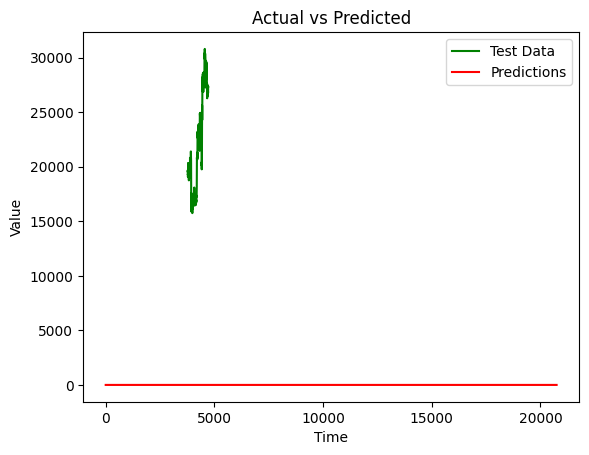

In [200]:
import matplotlib.pyplot as plt

# Plotting the training data
#plt.plot(y_train, color='blue', label='Training Data', )

# Plotting the test data
plt.plot( y_test, color='green', label='Test Data')

# Plotting the predictions
plt.plot(predictions, color='red', label='Predictions')

# Set the labels and title of the plot
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


In [187]:
y_train

3388    21491.19
3134    39602.93
4319    21458.38
599     10936.64
2121    44847.26
          ...   
4426    20445.43
466      9255.49
3092    40074.94
3772    19591.51
860     10619.13
Name: close, Length: 3772, dtype: float64